In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# Load the uploaded Excel file
file_path = 'diferenciaCPU.xlsx'
#Columnas a comparar
columnas = ['Hill-climbing', 'Hill-climbing-1']


data = pd.read_excel(file_path, sheet_name=None)

# Display the sheet names and the first few rows of each sheet to understand the structure of the data
sheet_names = data.keys()
data_preview = {sheet: data[sheet].head() for sheet in sheet_names}
sheet_names, data_preview

(dict_keys(['Tiempos', 'Nodos']),
 {'Tiempos':      Problema  Hill-climbing  Simulated-annealing  Hill-climbing-1  \
  0    ex14_2_7          35.51                34.61            36.24   
  1     ex2_1_7           9.00                21.87             9.78   
  2     ex2_1_8           8.29                14.83             8.38   
  3     ex2_1_9           6.00                12.79             6.16   
  4  ex6_1_3bis           8.61                 8.72             8.94   
  
     Simulated-annealing-1  
  0                  35.45  
  1                  22.76  
  2                  14.07  
  3                  12.73  
  4                   9.03  ,
  'Nodos':      Problema  Hill-climbing  Simulated-annealing  Hill-climbing-1  \
  0    ex14_2_7        12931.2              12770.4          12931.2   
  1     ex2_1_7         2444.0               6186.0           2444.0   
  2     ex2_1_8         1657.2               3149.2           1657.2   
  3     ex2_1_9         5153.6              1135

In [23]:
# Obtener la lista de nombres de los problemas y guardarla en una lista
problemas = data['Tiempos']['Problema'].tolist()

# Mostrar la lista de problemas
problemas

['ex14_2_7',
 'ex2_1_7',
 'ex2_1_8',
 'ex2_1_9',
 'ex6_1_3bis',
 'ex6_2_12',
 'ex6_2_6',
 'ex6_2_8',
 'ex6_2_9',
 'ex8_4_4bis',
 'himmel16',
 'launch']

In [24]:
# borrar las demas columnas
for sheet in sheet_names:
    data[sheet] = data[sheet][columnas]

# Mostrar head de cada hoja
data_preview = {sheet: data[sheet].head() for sheet in sheet_names}
data_preview


{'Tiempos':    Hill-climbing  Hill-climbing-1
 0          35.51            36.24
 1           9.00             9.78
 2           8.29             8.38
 3           6.00             6.16
 4           8.61             8.94,
 'Nodos':    Hill-climbing  Hill-climbing-1
 0        12931.2          12931.2
 1         2444.0           2444.0
 2         1657.2           1657.2
 3         5153.6           5153.6
 4        11018.0          11018.0}

In [25]:
# Normalizar filas
for sheet in sheet_names:
    data[sheet] = data[sheet].div(data[sheet].sum(axis=1), axis=0)

# Mostrar head de cada hoja
data_preview = {sheet: data[sheet] for sheet in sheet_names}
data_preview

{'Tiempos':     Hill-climbing  Hill-climbing-1
 0        0.494913         0.505087
 1        0.479233         0.520767
 2        0.497301         0.502699
 3        0.493421         0.506579
 4        0.490598         0.509402
 5        0.493644         0.506356
 6        0.481842         0.518158
 7        0.507438         0.492562
 8        0.500165         0.499835
 9        0.499281         0.500719
 10       0.496612         0.503388
 11       0.503133         0.496867,
 'Nodos':     Hill-climbing  Hill-climbing-1
 0        0.500000         0.500000
 1        0.500000         0.500000
 2        0.500000         0.500000
 3        0.500000         0.500000
 4        0.500000         0.500000
 5        0.500000         0.500000
 6        0.500000         0.500000
 7        0.500000         0.500000
 8        0.500000         0.500000
 9        0.500000         0.500000
 10       0.498446         0.501554
 11       0.500000         0.500000}

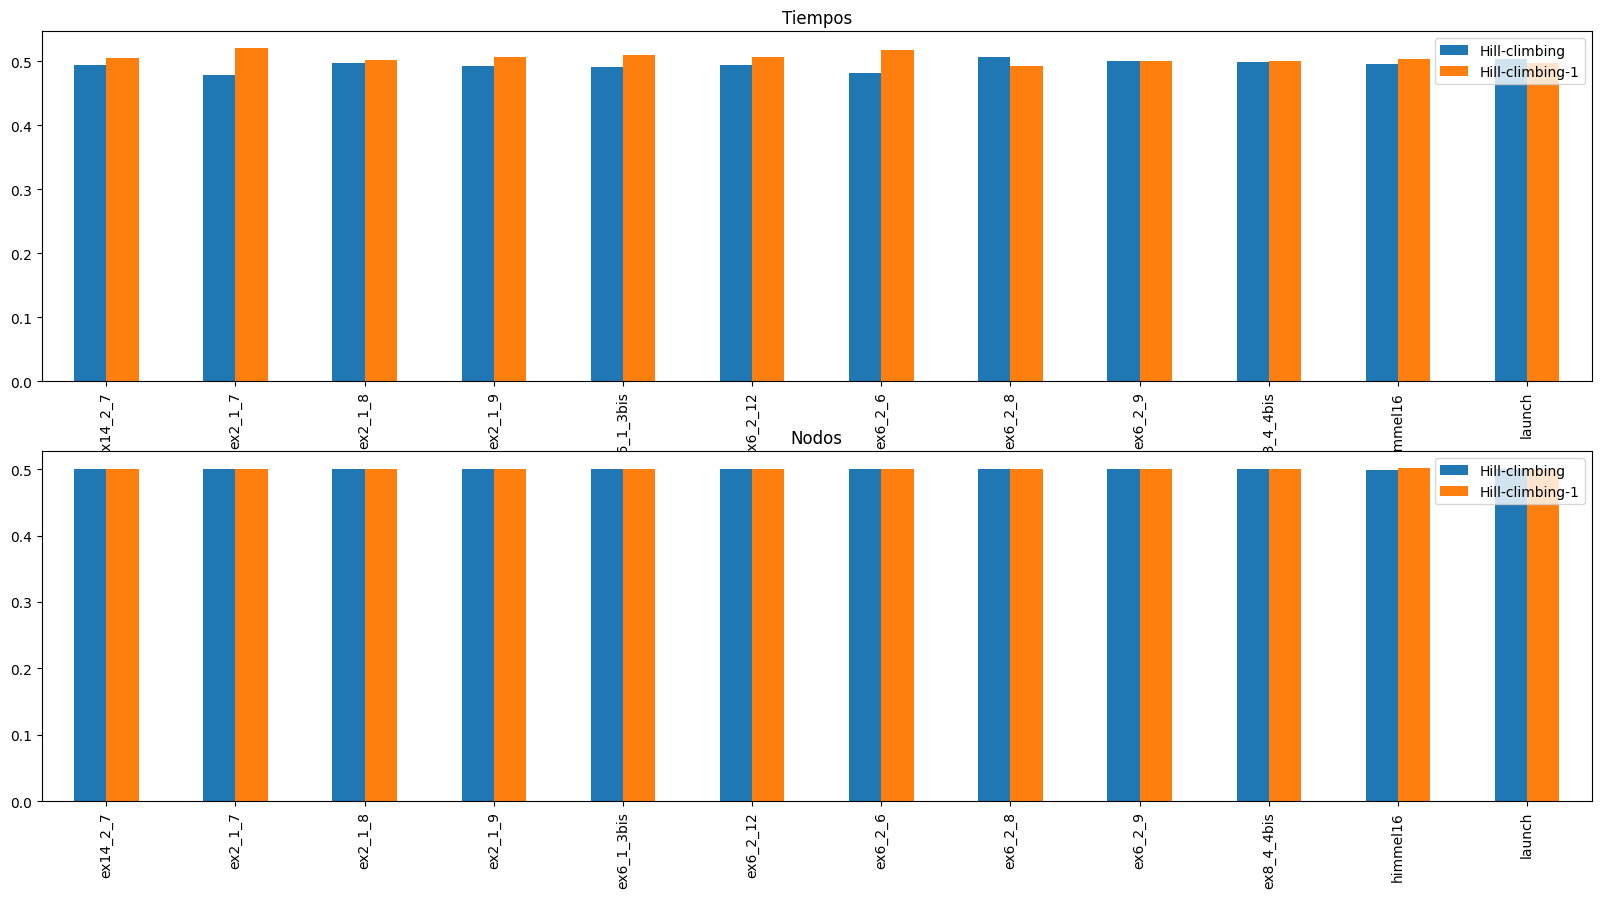

In [26]:
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
data['Tiempos'].plot(kind='bar', ax=axs[0])
data['Nodos'].plot(kind='bar', ax=axs[1])
axs[0].set_title('Tiempos')
axs[1].set_title('Nodos')

# Set the x-tick labels to be the problem names
axs[0].set_xticklabels(problemas)
axs[1].set_xticklabels(problemas)

plt.show()


In [27]:
# Sacar diferencia % entre columnas
for sheet in sheet_names:
    data[sheet]['Diferencia'] = data[sheet].diff(axis=1).iloc[:, -1] * 100

# Mostrar head de cada hoja
data_preview = {sheet: data[sheet] for sheet in sheet_names}
data_preview

{'Tiempos':     Hill-climbing  Hill-climbing-1  Diferencia
 0        0.494913         0.505087    1.017422
 1        0.479233         0.520767    4.153355
 2        0.497301         0.502699    0.539892
 3        0.493421         0.506579    1.315789
 4        0.490598         0.509402    1.880342
 5        0.493644         0.506356    1.271186
 6        0.481842         0.518158    3.631700
 7        0.507438         0.492562   -1.487511
 8        0.500165         0.499835   -0.032971
 9        0.499281         0.500719    0.143708
 10       0.496612         0.503388    0.677561
 11       0.503133         0.496867   -0.626566,
 'Nodos':     Hill-climbing  Hill-climbing-1  Diferencia
 0        0.500000         0.500000    0.000000
 1        0.500000         0.500000    0.000000
 2        0.500000         0.500000    0.000000
 3        0.500000         0.500000    0.000000
 4        0.500000         0.500000    0.000000
 5        0.500000         0.500000    0.000000
 6        0.500000 

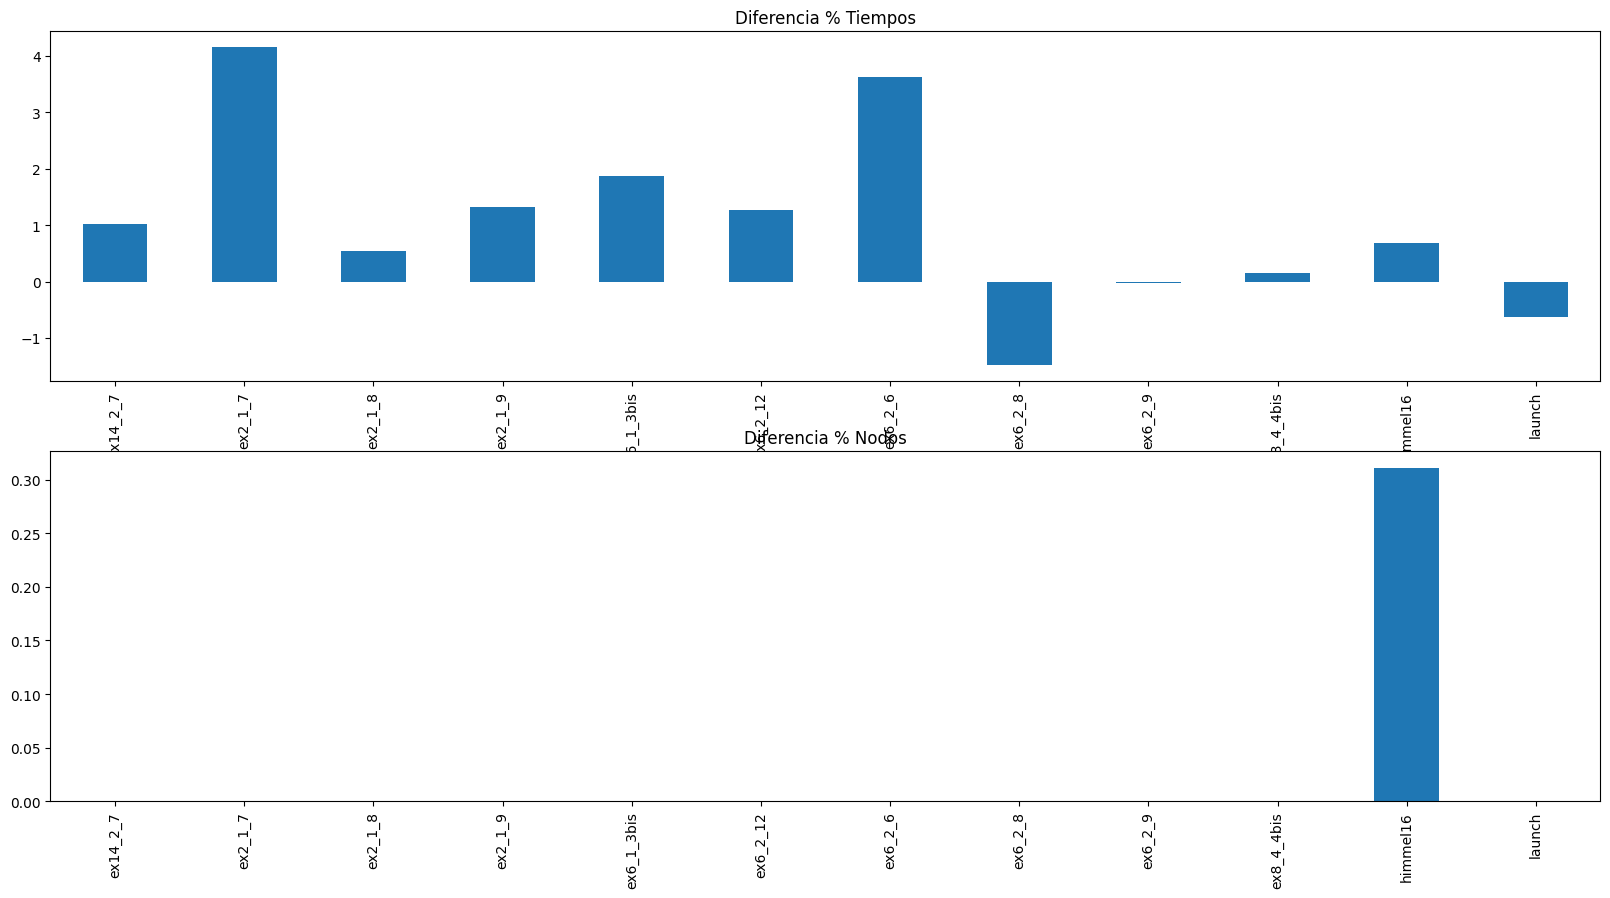

In [28]:
# graficar diferencias
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
data['Tiempos']['Diferencia'].plot(kind='bar', ax=axs[0])
data['Nodos']['Diferencia'].plot(kind='bar', ax=axs[1])
axs[0].set_title('Diferencia % Tiempos')
axs[1].set_title('Diferencia % Nodos')

# Set the x-tick labels to be the problem names
axs[0].set_xticklabels(problemas)
axs[1].set_xticklabels(problemas)

plt.show()

In [29]:
# sacar promedio de diferencias
promedio_diferencias = {sheet: data[sheet]['Diferencia'].mean() for sheet in sheet_names}
promedio_diferencias

{'Tiempos': 1.0403255530765925, 'Nodos': 0.02589307572076945}

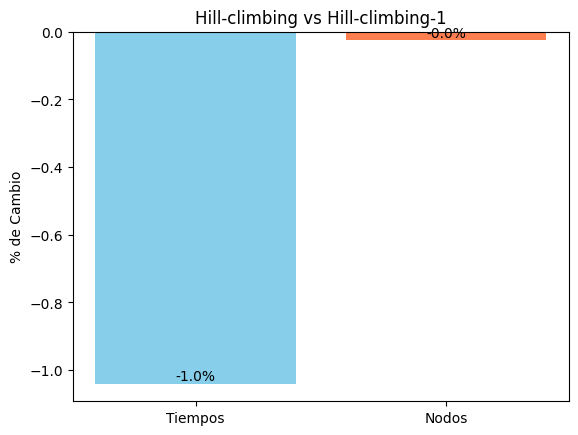

In [30]:
# Crear la figura y los ejes
fig, ax = plt.subplots()

# Multiplicar los promedios por -1
promedio_diferencias_negativos = {k: -v for k, v in promedio_diferencias.items()}

# Definir una lista de colores agradables
colores = ['skyblue', 'coral']

# Graficar los promedios con colores
bars = ax.bar(promedio_diferencias_negativos.keys(), promedio_diferencias_negativos.values(), color=colores)

# Establecer el título del gráfico con los nombres de las columnas
ax.set_title(f'{columnas[0]} vs {columnas[1]}')

# Establecer el nombre del eje y
ax.set_ylabel('% de Cambio')

# Agregar los valores de las barras en el gráfico como porcentajes
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval , 1)}%', ha='center', va='bottom')

# Agregar una nota al gráfico
# ax.text(0.02, 0.1, 'Nota: Los valores positivos están a favor de ' + columnas[1], transform=ax.transAxes)

plt.show()

In [31]:
# Calculo de Speed Up
for sheet in sheet_names:
    data[sheet]['Speed Up'] = data[sheet][columnas[0]] / data[sheet][columnas[1]]

# Mostrar head de cada hoja
data_preview = {sheet: data[sheet] for sheet in sheet_names}
data_preview

{'Tiempos':     Hill-climbing  Hill-climbing-1  Diferencia  Speed Up
 0        0.494913         0.505087    1.017422  0.979857
 1        0.479233         0.520767    4.153355  0.920245
 2        0.497301         0.502699    0.539892  0.989260
 3        0.493421         0.506579    1.315789  0.974026
 4        0.490598         0.509402    1.880342  0.963087
 5        0.493644         0.506356    1.271186  0.974895
 6        0.481842         0.518158    3.631700  0.929911
 7        0.507438         0.492562   -1.487511  1.030199
 8        0.500165         0.499835   -0.032971  1.000660
 9        0.499281         0.500719    0.143708  0.997130
 10       0.496612         0.503388    0.677561  0.986540
 11       0.503133         0.496867   -0.626566  1.012610,
 'Nodos':     Hill-climbing  Hill-climbing-1  Diferencia  Speed Up
 0        0.500000         0.500000    0.000000  1.000000
 1        0.500000         0.500000    0.000000  1.000000
 2        0.500000         0.500000    0.000000  1.

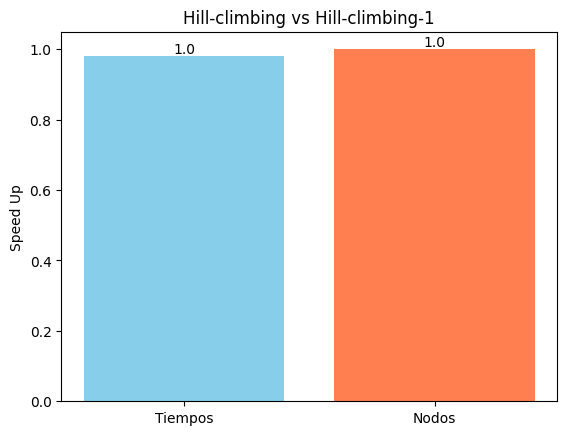

In [32]:
# Promedio de Speed Up
promedio_speed_up = {sheet: data[sheet]['Speed Up'].mean() for sheet in sheet_names}
promedio_speed_up

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Definir una lista de colores agradables
colores = ['skyblue', 'coral']

# Graficar los promedios con colores
bars = ax.bar(promedio_speed_up.keys(), promedio_speed_up.values(), color=colores)

# Establecer el título del gráfico con los nombres de las columnas
ax.set_title(f'{columnas[0]} vs {columnas[1]}')

# Establecer el nombre del eje y
ax.set_ylabel('Speed Up')

# Agregar los valores de las barras en el gráfico como porcentajes
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval , 1)}', ha='center', va='bottom')

# Agregar una nota al gráfico
# ax.text(0.02, 0.1, 'Nota: Los valores positivos están a favor de ' + columnas[1], transform=ax.transAxes)

plt.show()